### [ Batch Normalization 구현하기 ]

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Input, Activation

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
class Dataset:
    # 데이터셋을 배치 단위로 처리할 수 있도록 도와주는 Class
    def __init__(self, images, labels):
        self.images = images.copy()
        self.labels = labels.copy()
        self.labels = self.labels.ravel() # (None,1) -> (None,)
        self.counter = 0
        
    def __len__(self):
        # 데이터의 갯수를 반환
        # e.g) len(dataset)
        return len(self.images)

    def next_batch(self, batch_size=32):
        if self.counter + batch_size > len(self.images):
            # counter가 데이터셋의 갯수보다 초과한 경우,
            # 데이터셋을 섞어줌
            self.shuffle()
            self.counter = 0
        batch_images = self.images[self.counter:self.counter+batch_size]
        batch_labels = self.labels[self.counter:self.counter+batch_size]
        self.counter+=batch_size
        return batch_images.copy(), batch_labels.copy()
    
    def shuffle(self):
        # 데이터 셋을 섞어주는 함수
        indices = np.arange(len(self.images))
        np.random.shuffle(indices)        
        self.images = self.images[indices]
        self.labels = self.labels[indices]

## 실험 (Experiments)

### (1) MNIST 데이터셋을 통한 Batch Normalization의 유무 비교
- Mnist를 학습시키는 모델을 통해 BatchNormalization의 유무가 어떤 차이를 보이는지 확인

#### 1.1 MNIST 불러오기

In [59]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()



# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# 검증용데이터는 학습데이터의 20%
X_train, X_valid , y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 7)

# 타겟 변수를 one-hot encoding 한다
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape , y_train.shape)
print(X_valid.shape , y_valid.shape)
print(X_test.shape, y_test.shape)

(48000, 784) (48000, 10)
(12000, 784) (12000,)
(10000, 784) (10000, 10)


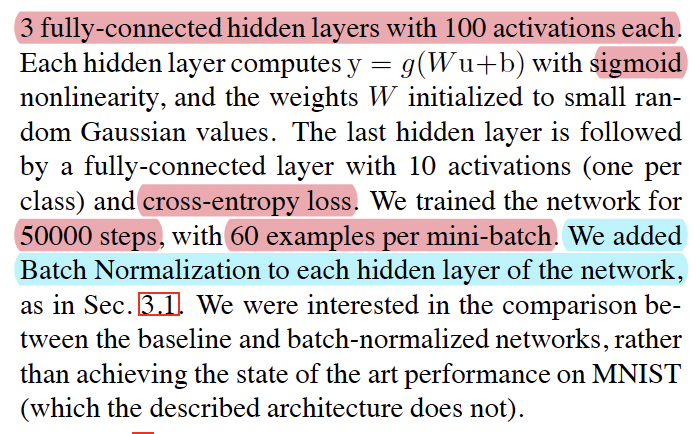

##### (2) 간단한 MLP 모델 구현

In [22]:
# Model Layer 구성하기

model = Sequential()
model.add(Dense(100, input_shape = (784, )))  # 1
# model.add(BatchNormalization()) # Add Batchnorm layer before Activation
model.add(Activation('sigmoid'))    
model.add(Dense(100))  # 2
# model.add(BatchNormalization())   # Add Batchnorm layer before Activation
model.add(Activation('sigmoid'))    
model.add(Dense(100))  # 3 
# model.add(BatchNormalization())   # Add Batchnorm layer before Activation
model.add(Activation('sigmoid'))    
model.add(Dense(10))   # output
model.add(Activation('softmax'))

In [23]:
# Model Complile

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [60]:
# 논문에서 활용한 변수들 설정

epochs = 50000
batch_size = 32

In [61]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1000)

Epoch 1/50000


2022-03-03 17:13:10.647204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


ValueError: Creating variables on a non-first call to a function decorated with tf.function.